# a_freyberg_pstfrom_pest_setup_Beta_01______2_01___ __Symplifield_version_____

In [1]:
import sys
import os
import shutil
import platform
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import pyemu
import flopy                          
sys.path.insert(0,"..")
import herebedragons as hbd

In [2]:
org_d = os.path.join('..', 'a_REF_01_extra_crispy',)
tmp_d = os.path.join('v1_Pstfrom_data_IN_Frey')                                                  # New folder
if os.path.exists(tmp_d):
    shutil.rmtree(tmp_d)
shutil.copytree(org_d,tmp_d)
hbd.prep_bins(tmp_d)                                      # executables  
hbd.prep_deps(tmp_d)                                      # get dependency folders

In [3]:
# os.listdir(tmp_d)                                      `GUI ___PstFrom` 
sim = flopy.mf6.MFSimulation.load(sim_ws=tmp_d)                                     
gwf = sim.get_model()                                    
pyemu.os_utils.run("mf6",cwd=tmp_d)                       # run _________________________________ made beforehand with flopy 

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package sto...
    loading package oc...
    loading package wel...
    loading package rch...
    loading package ghb...
    loading package sfr...
    loading package obs...
  loading solution package freyberg6...
mf6.exe


In [4]:
sr = pyemu.helpers.SpatialReference.from_namfile(os.path.join(tmp_d, "freyberg6.nam"),                               
        delr=gwf.dis.delr.array, delc=gwf.dis.delc.array)                    # sr

   could not remove start_datetime


In [5]:
template_ws = os.path.join("v1_Pstfrom_Beta_new_folder")                    # New Folder !
start_datetime="1-1-2008"

pf = pyemu.utils.PstFrom(original_d=tmp_d, new_d=template_ws, remove_existing=True, longnames=True,                 
                            spatial_reference=sr, zero_based=False, start_datetime=start_datetime, echo=False)                    

# <font color='blue'> __01__OBS(a)__ </font>

In [6]:
df = pd.read_csv(os.path.join(template_ws,"heads.csv"),index_col=0)              # Loading dataframe (PANDAS)
hds_df = pf.add_observations("heads.csv", insfile="heads.csv.ins", index_cols="time",                           
                            use_cols=list(df.columns.values), prefix="hds")                                

df = pd.read_csv(os.path.join(template_ws, "sfr.csv"), index_col=0)      
sfr_df = pf.add_observations("sfr.csv", insfile="sfr.csv.ins", index_cols="time", 
                             use_cols=list(df.columns.values), prefix="sfr")                  

In [7]:
 pst = pf.build_pst()                                                    # o 400

noptmax:0, npar_adj:0, nnz_obs:400


# <font color='red'> __02__PAR(a)__ </font>

In [8]:
v_pp = pyemu.geostats.ExpVario(contribution=1.0, a=15000, anisotropy=1.0, bearing=0.0)
pp_gs = pyemu.geostats.GeoStruct(variograms=v_pp, transform='log')                             # geostatistics to pilot points 

tag = "npf_k_"
files = [f for f in os.listdir(template_ws) if tag in f.lower() and f.endswith(".txt")] 
print(files) 
ib = gwf.dis.idomain.array[0]                                         # inactive cells        # ib        # plt.imshow(ib)  

f = 'freyberg6.npf_k_layer1.txt'
df_pp = pf.add_parameters(f, zone_array=ib, par_type="pilotpoints", geostruct=pp_gs,          # __________________ pp_gs
                par_name_base=f.split('.')[1].replace("_","")+"pp",
                pargp=f.split('.')[1].replace("_","")+"pp",
                ult_ubound=100, upper_bound=5.0,      lower_bound=0.2, ult_lbound=0.01, pp_space=6)  # ___________ Position  

['freyberg6.npf_k_layer1.txt']
starting interp point loop for 706 points
starting 0
starting 1
starting 2
starting 3
starting 4
starting 5
starting 6
starting 7
starting 8
starting 9
took 4.060242 seconds


In [9]:
pst = pf.build_pst()                                                  # p 18 

noptmax:0, npar_adj:18, nnz_obs:400


In [10]:
tag = "sto_ss"
files = [f for f in os.listdir(template_ws) if tag in f.lower() and f.endswith(".txt")]
print(files)

['freyberg6.sto_ss_layer1.txt']


In [11]:
f = 'freyberg6.sto_ss_layer1.txt'
df_pp = pf.add_parameters(f, zone_array=ib, par_type="pilotpoints", geostruct=pp_gs,          # __________________ pp_gs
                par_name_base=f.split('.')[1].replace("_","")+"pp",
                pargp=f.split('.')[1].replace("_","")+"pp",
                ult_ubound=0.2, upper_bound=5.0,      lower_bound=1e-3, ult_lbound=1e-7, pp_space=5)  # ___________ Position  

starting interp point loop for 706 points
starting 0
starting 1
starting 2
starting 3
starting 4
starting 5
starting 6
starting 7
starting 8
starting 9
took 4.192695 seconds


In [12]:
pst = pf.build_pst()                                                  # p 47

noptmax:0, npar_adj:47, nnz_obs:400


In [13]:
f = 'freyberg6.sto_sy_layer1.txt'
df_pp = pf.add_parameters(f, zone_array=ib, par_type="pilotpoints", geostruct=pp_gs,          # __________________ pp_gs
                par_name_base=f.split('.')[1].replace("_","")+"pp",
                pargp=f.split('.')[1].replace("_","")+"pp",
                ult_ubound=0.2, upper_bound=5.0,      lower_bound=0.4, ult_lbound=0.01, pp_space=10)  # ___________ Position  

starting interp point loop for 706 points
starting 0
starting 1
starting 2
starting 3
starting 4
starting 5
starting 6
starting 7
starting 8
starting 9
took 4.380779 seconds


In [14]:
pst = pf.build_pst()                                                  # p 54

noptmax:0, npar_adj:54, nnz_obs:400


In [15]:
f = 'freyberg_mp.ne_layer1.txt'
df_pp = pf.add_parameters(f, zone_array=ib, par_type="pilotpoints", geostruct=pp_gs,          # __________________ pp_gs
                par_name_base=f.split('.')[1].replace("_","")+"pp",
                pargp=f.split('.')[1].replace("_","")+"pp",
                ult_ubound=0.2, upper_bound=5.0,      lower_bound=0.4, ult_lbound=0.01, pp_space=10)  # ___________ Position  

In [16]:
pst = pf.build_pst()                                                  # p 61 

noptmax:0, npar_adj:61, nnz_obs:400


In [17]:
f = 'freyberg_mp.ne_layer2.txt'
df_pp = pf.add_parameters(f, zone_array=ib, par_type="pilotpoints", geostruct=pp_gs,          # __________________ pp_gs
                par_name_base=f.split('.')[1].replace("_","")+"pp",
                pargp=f.split('.')[1].replace("_","")+"pp",
                ult_ubound=0.2, upper_bound=5.0,      lower_bound=0.4, ult_lbound=0.01, pp_space=10)  # ___________ Position  

In [18]:
f = 'freyberg_mp.ne_layer3.txt'
df_pp = pf.add_parameters(f, zone_array=ib, par_type="pilotpoints", geostruct=pp_gs,          # __________________ pp_gs
                par_name_base=f.split('.')[1].replace("_","")+"pp",
                pargp=f.split('.')[1].replace("_","")+"pp",
                ult_ubound=0.2, upper_bound=5.0,      lower_bound=0.4, ult_lbound=0.01, pp_space=10)  # ___________ Position  

In [19]:
pst = pf.build_pst()                                                 # p 75 ("2x")

noptmax:0, npar_adj:75, nnz_obs:400


In [20]:
# len([f for f in os.listdir(template_ws) if f.endswith(".tpl")])

### <font color='red'> Recharge </font>   

In [21]:
dts = pd.to_datetime(start_datetime) + pd.to_timedelta(np.cumsum(sim.tdis.perioddata.array["perlen"]),unit='d') # container # dts   

In [22]:
v_time = pyemu.geostats.ExpVario(contribution=1.0, a=60, anisotropy=1.0, bearing=0.0)
temporal_gs = pyemu.geostats.GeoStruct(variograms=v_time, transform='none')                    # geostatistics time

tag = "rch_recharge"
files = [f for f in os.listdir(template_ws) if tag in f.lower() and f.endswith(".txt")]
sp = [int(f.split(".")[1].split('_')[-1]) for f in files]
d = {s:f for s,f in zip(sp,files)}
sp.sort()
files = [d[s] for s in sp]                                                            
# print(files)

In [23]:
for f in files:                                                           
    kper = int(f.split('.')[1].split('_')[-1]) - 1                                    # temporal correlation _______________ RCH 
    pf.add_parameters(filenames=f, zone_array=ib, par_type="constant",                # ____________________________________ tDIS  
                    par_name_base=f.split('.')[1]+"tcn", pargp=f.split('.')[1]+"tcn",
                    ult_lbound=0, upper_bound=1.5,       lower_bound=0.5, ult_ubound=1e-3,
                    datetime=dts[kper], geostruct=temporal_gs)  

In [24]:
pst = pf.build_pst()                                                   # p 100

noptmax:0, npar_adj:100, nnz_obs:400


# <font color='green'> __03__Boundary-Conditions__ </font> # <font color='red'> &__PAR(b)__ </font> 

In [25]:
v_grid = pyemu.geostats.ExpVario(contribution=1.0, a=1000, anisotropy=1.0,bearing=0.0)
grid_gs = pyemu.geostats.GeoStruct(variograms=v_grid, transform='log')                     # Geoestatistics

tag = "ghb_stress_period_data"
files = [f for f in os.listdir(template_ws) if tag in f.lower() and f.endswith(".txt")]
for f in files:
    
    name = 'ghbcond'                                         
    pf.add_parameters(f, par_type="constant", geostruct=grid_gs,       # _________HEAD___________________________ 
                        par_name_base=name+"cn", pargp=name+"cn",
                        index_cols=[0,1,2], ult_ubound=100, upper_bound=10.0, use_cols=[4], lower_bound=0.1, ult_lbound=0.01, )      
    
    name = 'ghbhead'   
    pf.add_parameters(f, par_type="constant", geostruct=grid_gs,       # _________CONDUCTANCE___________________   
                        par_name_base=name+"cn", pargp=name+"cn",
                        index_cols=[0,1,2], ult_ubound=42, upper_bound=2.0, use_cols=[3], lower_bound=-2.0, ult_lbound=32.5,
                        par_style="a", transform="none")                                                                           # added

In [26]:
pst = pf.build_pst()                                                   # p 102

noptmax:0, npar_adj:102, nnz_obs:400


In [27]:
files = [f for f in os.listdir(template_ws) if "wel_stress_period_data" in f and f.endswith(".txt")]
sp = [int(f.split(".")[1].split('_')[-1]) for f in files]
d = {s:f for s,f in zip(sp,files)}
sp.sort()
files = [d[s] for s in sp]

for f in files:
    kper = int(f.split('.')[1].split('_')[-1]) - 1                                            
    
    pf.add_parameters(filenames=f, index_cols=[0,1,2],                                     # ____________________________________ Well 
                        par_type="constant", par_name_base="welcst", pargp="welcst", 
                        upper_bound = 4, use_cols=[3], lower_bound=0.25,                    
                        datetime=dts[kper], geostruct=temporal_gs)

In [28]:
pst = pf.build_pst()                                                   # p 127

noptmax:0, npar_adj:127, nnz_obs:400


In [29]:
#tag = "sfr"
#files = [f for f in os.listdir(template_ws) if tag in f.lower() and f.endswith(".txt")]
#print(files)
tag = "sfr_packagedata"
files = [f for f in os.listdir(template_ws) if tag in f.lower() and f.endswith(".txt")]
assert len(files) == 1                                 
print(files)                            # ___________________ ?

['freyberg6.sfr_packagedata.txt']


In [30]:
f = files[0]                                            
name = "sfrcond"

pf.add_parameters(f, par_type="constant", geostruct=grid_gs, par_name_base=name+"cn", pargp=name+"cn",
                index_cols=[0,2,3], ult_ubound=100, upper_bound=10.0, use_cols=[9], lower_bound=0.1, ult_lbound=0.001)      

files = [f for f in os.listdir(template_ws) if "sfr_perioddata" in f and f.endswith(".txt")]
sp = [int(f.split(".")[1].split('_')[-1]) for f in files]
d = {s:f for s,f in zip(sp,files)}
sp.sort()
files = [d[s] for s in sp]                                     

for f in files:
    kper = int(f.split('.')[1].split('_')[-1]) - 1                                          
    pf.add_parameters(filenames=f, par_type="grid", par_name_base="sfrgr", pargp="sfrgr",                   # _____________ INFLOW  ___ sfr
                        index_cols=[0], upper_bound = 10, use_cols=[2], lower_bound=0.1,     
                        datetime=dts[kper], geostruct=temporal_gs)                                           # grid ____ ?

In [31]:
pst = pf.build_pst()                                                   # p 129

noptmax:0, npar_adj:129, nnz_obs:400


# __04_IC__

In [32]:
files = [f for f in os.listdir(template_ws) if "ic_strt" in f and f.endswith(".txt")]
files
for f in files:
    base = f.split(".")[1].replace("_","")
    df = pf.add_parameters(f,par_type="grid",par_style="d", par_name_base=base, pargp=base,
                           upper_bound=50,lower_bound=15, zone_array=ib, transform="none")
    print(df.shape)

(706, 17)


In [33]:
pst = pf.build_pst()                                                   # p 835 _______________ * 

noptmax:0, npar_adj:835, nnz_obs:400


In [34]:
pf.mod_sys_cmds.append("mf6")                                          # _________ Forward

# <font color='blue'> __05__2º___OBS(b)__ </font>

In [35]:
import helpers
helpers.process_secondary_obs(ws=template_ws)  
[f for f in os.listdir(template_ws) if f.endswith(".csv")]

Secondary observation files processed.


['heads.csv',
 'heads.tdiff.csv',
 'mult2model_info.csv',
 'sfr.csv',
 'sfr.tdiff.csv']

In [36]:
pf.add_py_function("helpers.py", "process_secondary_obs(ws='.')", is_pre_cmd=False)                         

In [37]:
df = pd.read_csv(os.path.join(template_ws, "sfr.tdiff.csv"), index_col=0)      # Adding.. temporal-differences between OBS
_ = pf.add_observations("sfr.tdiff.csv",                                       
                            insfile="sfr.tdiff.csv.ins",                       
                            index_cols="time",                                 
                            use_cols=list(df.columns.values),                 
                            prefix="sfrtd")                                    
                            
df = pd.read_csv(os.path.join(template_ws, "heads.tdiff.csv"), index_col=0)
_ = pf.add_observations("heads.tdiff.csv", 
                            insfile="heads.tdiff.csv.ins",                     
                            index_cols="time", 
                            use_cols=list(df.columns.values), 
                            prefix="hdstd")                                    

In [38]:
pst = pf.build_pst()                                                   # p 835 _______________ * 

noptmax:0, npar_adj:835, nnz_obs:800


### __bugs__

In [39]:
head_pargps = [i for i in pst.adj_par_groups if 'head' in i]

pst.parameter_groups.loc[head_pargps, 'inctyp'] = 'absolute'
par = pst.parameter_data
par_names = par.loc[par.parval1==0].parnme                    

offset = -10
par.loc[par_names, 'offset'] = offset
par.loc[par_names, ['parval1', 'parlbnd', 'parubnd']] -= offset

### __forecasts__

In [40]:
forecasts =['oname:sfr_otype:lst_usecol:tailwater_time:4383.5',
            'oname:sfr_otype:lst_usecol:headwater_time:4383.5',
            'oname:hds_otype:lst_usecol:trgw-0-9-1_time:4383.5',
            'part_time']
# forecasts

In [41]:
pst.pestpp_options['forecasts'] = forecasts

# __06__Writing______RUNNING PEST__

In [42]:
pst.write(os.path.join(template_ws, 'v1_Pstfrom_data_IN_Frey.pst'),version=2) 
pyemu.os_utils.run('pestpp-glm v1_Pstfrom_data_IN_Frey.pst', cwd=template_ws)
iobj = pd.read_csv(os.path.join(template_ws, 'v1_Pstfrom_data_IN_Frey.iobj'))
iobj.total_phi

noptmax:0, npar_adj:835, nnz_obs:800
pestpp-glm.exe v1_Pstfrom_data_IN_Frey.pst


0    0
Name: total_phi, dtype: int64

# __07__Ensemble__`   prior_01_cov.jcb, prior_02_pe.jcb   `

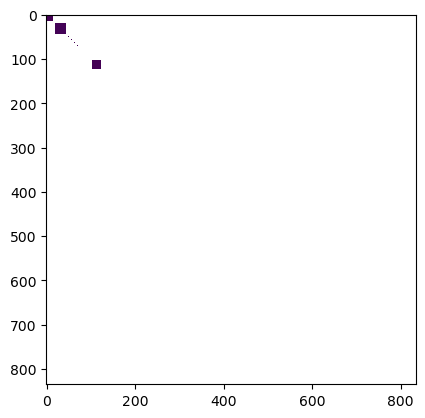

In [56]:
if pf.pst.npar < 900:                                                       #___max 35.000 lines _*.xls
    cov = pf.build_prior(fmt='coo', 
                         filename=os.path.join(template_ws,"prior_01_cov.jcb"))
    try: 
        x = cov.x.copy()
        x[x==0] = np.NaN
        plt.imshow(x[:1000,:1000])
    except:
        pass

In [44]:
from IPython.display import Image, display
display(Image(url='./COV_ideal.png'))

## __BETA__New_COV__? " no, cause it comes from *.pst (PAR), .... just ensemble in memory (?!) 

In [45]:
pst.pestpp_options['ies_parameter_ensemble'] = 'dummy_ies_par_ensemble.csv'    # Flagship _________________________________
pst.pestpp_options

{'forecasts': ['oname:sfr_otype:lst_usecol:tailwater_time:4383.5',
  'oname:sfr_otype:lst_usecol:headwater_time:4383.5',
  'oname:hds_otype:lst_usecol:trgw-0-9-1_time:4383.5',
  'part_time'],
 'ies_parameter_ensemble': 'dummy_ies_par_ensemble.csv'}

In [ ]:
# pst.control_data.formatted_values                  # ________________ from *.pst

In [59]:
cov.row_names[:10]

['pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:3_j:3_zone:1',
 'pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:3_j:9_zone:1',
 'pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:3_j:15_zone:1',
 'pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:9_j:3_zone:1',
 'pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:9_j:9_zone:1',
 'pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:9_j:15_zone:1',
 'pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:3_zone:1',
 'pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:9_zone:1',
 'pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:15_zone:1',
 'pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:21_j:3_zone:1']

In [57]:
pe = pf.draw(num_reals=1000, use_specsim=True)                      # PAR ___ prior___ distribution
pe.enforce()                                               
pe.to_binary(os.path.join(template_ws,"prior_02_pe.jcb"))     
assert pe.shape[1] == pst.npar                                      # Rolling the dice ...

building diagonal cov
processing  name:struct1,nugget:0.0,structures:
name:var1,contribution:1.0,a:15000.0,anisotropy:1.0,bearing:0.0

working on pargroups ['npfklayer1pp']
build cov matrix
done
getting diag var cov 18
scaling full cov by diag var cov
working on pargroups ['stosslayer1pp']
build cov matrix
done
getting diag var cov 29
scaling full cov by diag var cov
working on pargroups ['stosylayer1pp']
build cov matrix
done
getting diag var cov 7
scaling full cov by diag var cov
working on pargroups ['nelayer1pp']
build cov matrix
done
getting diag var cov 7
scaling full cov by diag var cov
working on pargroups ['nelayer2pp']
build cov matrix
done
getting diag var cov 7
scaling full cov by diag var cov
working on pargroups ['nelayer3pp']
build cov matrix
done
getting diag var cov 7
scaling full cov by diag var cov
processing  name:struct1,nugget:0.0,structures:
name:var1,contribution:1.0,a:60.0,anisotropy:1.0,bearing:0.0

working on pargroups ['welcst']
build cov matrix
done
getting

# __08__Run_Again__

In [49]:
pst.parameter_data.loc[:,"parval1"] = pe.loc[pe.index[0],pst.par_names].values          
pst.control_data.noptmax = 0
pst.write(os.path.join(template_ws,"Beta_Emsemble.pst"),version=2)
pyemu.os_utils.run("pestpp-glm Beta_Emsemble.pst",cwd=template_ws)                                                   

noptmax:0, npar_adj:835, nnz_obs:800
pestpp-glm.exe Beta_Emsemble.pst


In [50]:
iobj = pd.read_csv(os.path.join(template_ws, 'Beta_Emsemble.iobj'))
iobj.total_phi

0    53627700.0
Name: total_phi, dtype: float64

# __09__Graphics...__

In [51]:
# hdobj = gwf.output.head()                     #  simulated heads.... earlier results ..... 
# times = hdobj.get_times()
# hdobj.plot(mflay=0, colorbar=True, totim=times[-1], masked_values=[1e30]);          # gwf = sim.get_model()

In [52]:
# pst.phi_components 
# pst.plot(kind="phi_pie");